<IPython.core.display.Javascript object>


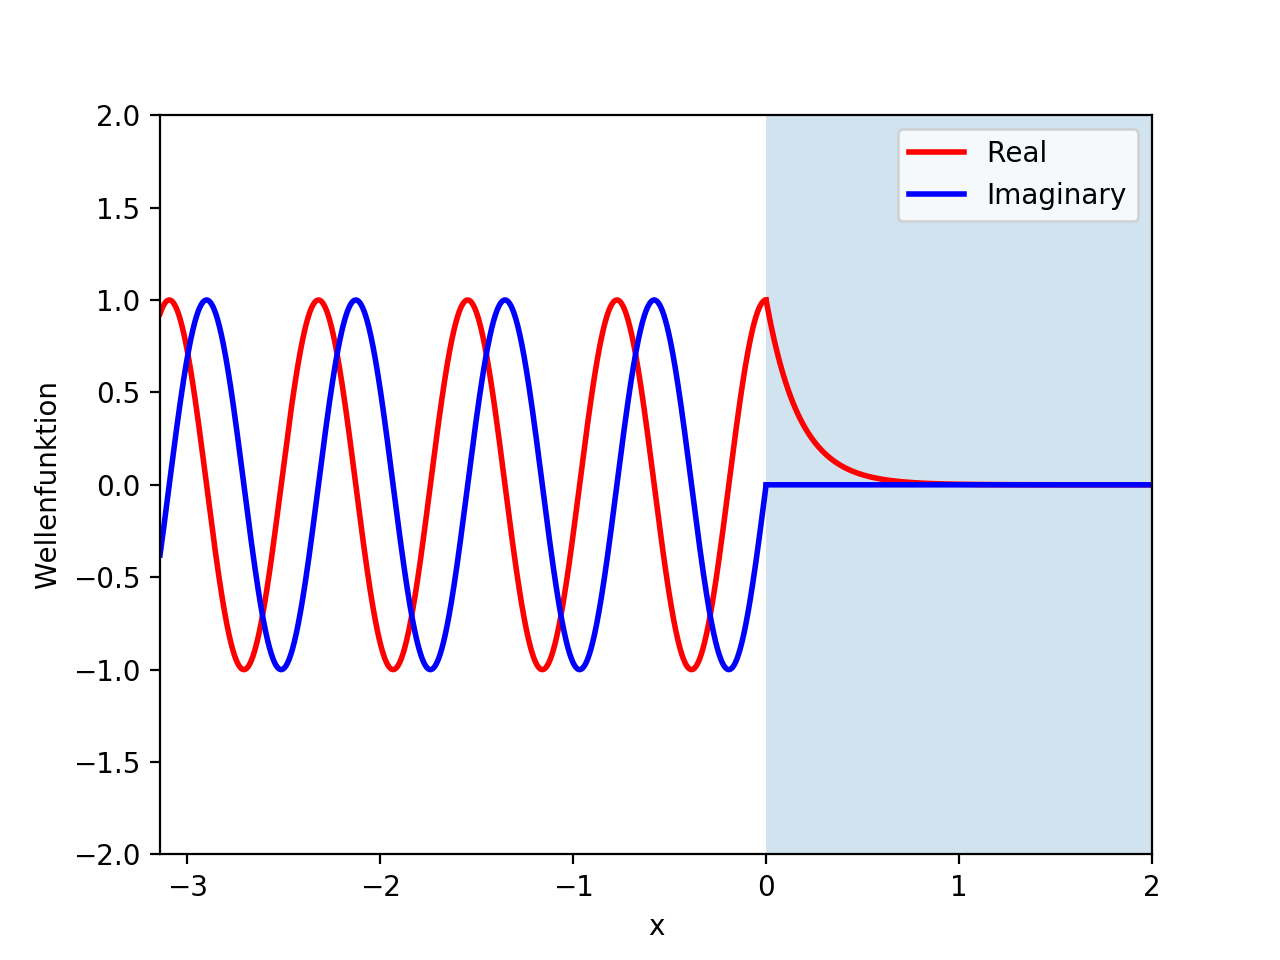

interactive(children=(FloatSlider(value=20.0, description='E', max=200.0, step=1.0), FloatSlider(value=100.0, …

In [1]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

#initial values
E0 = 20
V0 = 100
a = 1
b = 0
k = np.sqrt(E0)
kp = np.sqrt(V0-E0)

#create plot and data
x1 = np.arange(-3.141592, 0, 0.001)
x2 = np.arange(0, 2, 0.001)
y1_real = a*np.cos(k*x1)+b*np.cos(-k*x1)
y1_imag = a*np.sin(k*x1)+b*np.sin(-k*x1)
y2_real = a * np.exp(-kp*x2)
y2_imag = 0*x2

fig, ax = plt.subplots()
p1_real, = ax.plot(x1, y1_real, lw=2, color='red', label='Real')
p1_imag, = ax.plot(x1, y1_imag, lw=2, color='blue', label='Imaginary')
p2_real, = ax.plot(x2, y2_real, lw=2, color='red')
p2_imag, = ax.plot(x2, y2_imag, lw=2, color='blue')
ax.set_xlim(-3.141592, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('Wellenfunktion')
ax.legend(loc='upper right')
ax.add_patch(patches.Rectangle((0.0, -2.0), 2.0, 4.0, alpha=0.2))

@widgets.interact(E=(0.0, 200, 1.0), V=(0.0, 100, 1.0))
def update(E=E0, V=V0):
    k = np.sqrt(E)
    p1_real.set_ydata(a*np.cos(k*x1)+b*np.cos(-k*x1))
    p1_imag.set_ydata(a*np.sin(k*x1)+b*np.sin(-k*x1))
    if E < V:
        kp = np.sqrt(V-E)
        p2_real.set_ydata(a * np.exp(-kp*x2))
        p2_imag.set_ydata(0*x2)
    else:
        kp = np.sqrt(E-V)
        p2_real.set_ydata(a*np.cos(kp*x2)+b*np.cos(-kp*x2))
        p2_imag.set_ydata(a*np.sin(kp*x2)+b*np.sin(-kp*x2))